# Popular Keywords in S.Korean Leather Bag Market

To many outsiders, Korea is a highly collective and conservative—not necessarily limited to political terms—country that, based on such characteristics, frequently enforce uniformity to its people. This uniformity not only affects people’s behavior but also their appearance and outfit because beauty standard is also not free from being uniform. ([Odyssey](https://www.theodysseyonline.com/guess-different-women-photo))

![Uniformity](uniformity.jpg)

I would like to investigate this idea in relation to a project I am involved in currently. My role is to introduce the leather bag brand that is active in America, Adees Co., to South Korea. Given this opportunity, I will try to identify the uniformity that is potentially present in leather bag products while providing information relevant to Adees Co.’s product advertisement and description through this project. 

3 Websites analyzed: 
1. Mutemuse
2. Mad Goat
3. Avam

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from collections import Counter
from nltk.corpus import stopwords
from nltk import pos_tag
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("stopwords")
stop = stopwords.words("english")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/s2park2018/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/s2park2018/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/s2park2018/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from string import punctuation

In [3]:
import pandas as pd

In [4]:
import numpy as np
from numpy import ndarray

In [5]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
#!pip install spacy
#!python -m spacy download en_core_web_lg
import spacy

In [7]:
import seaborn as sns

## Brand Theme Identification (About Us Page Analysis)
Brands make explicit their theme or identity usually in their 'About Us' page. By analyzing the text they provide on the page, I will identify keywords that are used to create each company's brand image. 


### MuteMuse: About Us
![Mutemuse](mutemuse.png)

In [8]:
# Importing Text
MM_about = """Mutemuse captures inspiration from the corners of everyday life. 
It melts quietly everywhere, yet keeps attracting attention. 
Mutemuse imagines another inspiration that the object can give you."""

In [9]:
nlp = spacy.load("en_core_web_lg")

In [10]:
# Lemmatizing
def lemmatize(MM_about): 
    words = ' '.join(MM_about)
    doc = nlp(words)
    return [token.lemma_ for token in doc]
MM_lemma = lemmatize(MM_about.split())
print(MM_lemma)

['Mutemuse', 'capture', 'inspiration', 'from', 'the', 'corner', 'of', 'everyday', 'life', '.', '-PRON-', 'melt', 'quietly', 'everywhere', ',', 'yet', 'keep', 'attract', 'attention', '.', 'Mutemuse', 'imagine', 'another', 'inspiration', 'that', 'the', 'object', 'can', 'give', '-PRON-', '.']


In [11]:
# Removing Punctuation & Making all Lowercase
for char in punctuation: 
    MM_about = MM_about.replace(char, "")
MM_lemma = lemmatize(MM_about.lower().split())
print(MM_lemma)

['mutemuse', 'capture', 'inspiration', 'from', 'the', 'corner', 'of', 'everyday', 'life', '-PRON-', 'melt', 'quietly', 'everywhere', 'yet', 'keep', 'attract', 'attention', 'mutemuse', 'imagine', 'another', 'inspiration', 'that', 'the', 'object', 'can', 'give', '-PRON-']


In [12]:
nlp = spacy.load("en_core_web_lg")
doc = nlp(" ".join(MM_lemma))

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop)

mutemuse mutemuse NOUN NN nsubj xxxx True False
capture capture NOUN NN ROOT xxxx True False
inspiration inspiration NOUN NN dobj xxxx True False
from from ADP IN prep xxxx True True
the the DET DT det xxx True True
corner corner NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
everyday everyday ADJ JJ amod xxxx True False
life life NOUN NN pobj xxxx True False
-PRON- -PRON- PUNCT : punct -XXXX- False False
melt melt VERB VB conj xxxx True False
quietly quietly ADV RB advmod xxxx True False
everywhere everywhere ADV RB advmod xxxx True True
yet yet ADV RB advmod xxx True True
keep keep VERB VBP conj xxxx True True
attract attract VERB VB xcomp xxxx True False
attention attention NOUN NN compound xxxx True False
mutemuse mutemuse NOUN NN nsubj xxxx True False
imagine imagine VERB VB conj xxxx True False
another another DET DT det xxxx True True
inspiration inspiration NOUN NN dobj xxxx True False
that that ADP IN dobj xxxx True True
the the DET DT det xxx True True
object obj

In [13]:
d = []
for token in doc:
    d.append((token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop))

MM_out = pd.DataFrame(d, columns=("text", "lemma", "pos", "tag", "dep", "shape", 
                               "is_alpha", "is_stop"))
MM_out

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop
0,mutemuse,mutemuse,NOUN,NN,nsubj,xxxx,True,False
1,capture,capture,NOUN,NN,ROOT,xxxx,True,False
2,inspiration,inspiration,NOUN,NN,dobj,xxxx,True,False
3,from,from,ADP,IN,prep,xxxx,True,True
4,the,the,DET,DT,det,xxx,True,True
5,corner,corner,NOUN,NN,pobj,xxxx,True,False
6,of,of,ADP,IN,prep,xx,True,True
7,everyday,everyday,ADJ,JJ,amod,xxxx,True,False
8,life,life,NOUN,NN,pobj,xxxx,True,False
9,-PRON-,-PRON-,PUNCT,:,punct,-XXXX-,False,False


In [14]:
MM_stop = list(np.where(MM_out["is_stop"] == False)[0])
MM_out = MM_out.iloc[MM_stop]

In [15]:
# Subset Adjectives
MM_adj = MM_out[MM_out["pos"] == "ADJ"]
MM_adj

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop
7,everyday,everyday,ADJ,JJ,amod,xxxx,True,False


In [16]:
MM_freq1 = MM_adj["lemma"].value_counts()
MM_freq1

everyday    1
Name: lemma, dtype: int64

In [17]:
# Transforming to Dictionary 
MM_ABOUT = {k:v for k, v in MM_freq1.iteritems()}
MM_ABOUT

{'everyday': 1}

In [18]:
MM_ABOUT = pd.DataFrame.from_dict({'everyday': 1}, orient = 'index')
MM_ABOUT = MM_ABOUT.reset_index()
MM_ABOUT = MM_ABOUT.rename(columns={"index":"Keywords", 0:"Frequency"})
MM_ABOUT.head()

,Keywords,Frequency
0,everyday,1


### Mad Goat: About Us
![Mad Goat](madgoat.png)

In [19]:
# Importing Text
MG_about = """Cashmere and goat skin are loved by many due to their premium material. 
However, there are many products that are created with inappropriate raw material and are not reasonable. 
MADGOAT's goal is to be brand that establishes the standard on the quality of cachmere and goat skin. 
To do so, MADGOAT carefully selects the finest material and uses optimal leather and thread to produce the best goods. Restrained Gloamour. MADGOAT creates daily items with restrained glamour that could be your statement piece. Premium Gift. MADGOAT can deliver its own unique warmth and softness to beloved ones. Appropriate Raw Material. MADGOAT carefully selects distinctively beautiful colors and only uses self-dyed threads and leather."""

In [20]:
nlp = spacy.load("en_core_web_lg")

In [21]:
# Lemmatizing
def lemmatize(MG_about): 
    words = ' '.join(MG_about)
    doc = nlp(words)
    return [token.lemma_ for token in doc]
MG_lemma = lemmatize(MG_about.split())
print(MG_lemma)

['cashmere', 'and', 'goat', 'skin', 'be', 'love', 'by', 'many', 'due', 'to', '-PRON-', 'premium', 'material', '.', 'however', ',', 'there', 'be', 'many', 'product', 'that', 'be', 'create', 'with', 'inappropriate', 'raw', 'material', 'and', 'be', 'not', 'reasonable', '.', 'MADGOAT', "'s", 'goal', 'be', 'to', 'be', 'brand', 'that', 'establish', 'the', 'standard', 'on', 'the', 'quality', 'of', 'cachmere', 'and', 'goat', 'skin', '.', 'to', 'do', 'so', ',', 'MADGOAT', 'carefully', 'select', 'the', 'fine', 'material', 'and', 'use', 'optimal', 'leather', 'and', 'thread', 'to', 'produce', 'the', 'good', 'good', '.', 'restrained', 'Gloamour', '.', 'MADGOAT', 'create', 'daily', 'item', 'with', 'restrained', 'glamour', 'that', 'could', 'be', '-PRON-', 'statement', 'piece', '.', 'Premium', 'Gift', '.', 'MADGOAT', 'can', 'deliver', '-PRON-', 'own', 'unique', 'warmth', 'and', 'softness', 'to', 'beloved', 'one', '.', 'Appropriate', 'Raw', 'Material', '.', 'MADGOAT', 'carefully', 'select', 'distinctiv

In [22]:
# Removing Punctuation & Making all Lowercase
for char in punctuation: 
    MG_about = MG_about.replace(char, "")
MG_lemma = lemmatize(MG_about.lower().split())
print(MG_lemma)

['cashmere', 'and', 'goat', 'skin', 'be', 'love', 'by', 'many', 'due', 'to', '-PRON-', 'premium', 'material', 'however', 'there', 'be', 'many', 'product', 'that', 'be', 'create', 'with', 'inappropriate', 'raw', 'material', 'and', 'be', 'not', 'reasonable', 'madgoat', 'goal', 'be', 'to', 'be', 'brand', 'that', 'establish', 'the', 'standard', 'on', 'the', 'quality', 'of', 'cachmere', 'and', 'goat', 'skin', 'to', 'do', 'so', 'madgoat', 'carefully', 'select', 'the', 'fine', 'material', 'and', 'use', 'optimal', 'leather', 'and', 'thread', 'to', 'produce', 'the', 'good', 'good', 'restrain', 'gloamour', 'madgoat', 'create', 'daily', 'item', 'with', 'restrained', 'glamour', 'that', 'could', 'be', '-PRON-', 'statement', 'piece', 'premium', 'gift', 'madgoat', 'can', 'deliver', '-PRON-', 'own', 'unique', 'warmth', 'and', 'softness', 'to', 'beloved', 'one', 'appropriate', 'raw', 'material', 'madgoat', 'carefully', 'select', 'distinctively', 'beautiful', 'color', 'and', 'only', 'use', 'selfdyed', '

In [23]:
nlp = spacy.load("en_core_web_lg")
doc = nlp(" ".join(MG_lemma))

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop)

cashmere cashmere NOUN NN nmod xxxx True False
and and CCONJ CC cc xxx True True
goat goat NOUN NN conj xxxx True False
skin skin NOUN NN nsubj xxxx True False
be be VERB VB ROOT xx True True
love love NOUN NN attr xxxx True False
by by ADP IN prep xx True True
many many ADJ JJ amod xxxx True True
due due ADP IN amod xxx True True
to to ADP IN prep xx True True
-PRON- -pron- NUM CD punct -XXXX- False False
premium premium NOUN NN compound xxxx True False
material material NOUN NN pobj xxxx True False
however however ADV RB advmod xxxx True True
there there ADV EX expl xxxx True True
be be VERB VBP advcl xx True True
many many ADJ JJ amod xxxx True True
product product NOUN NN attr xxxx True False
that that DET WDT nsubjpass xxxx True True
be be VERB VB auxpass xx True True
create create ADJ JJ relcl xxxx True False
with with ADP IN prep xxxx True True
inappropriate inappropriate ADJ JJ amod xxxx True False
raw raw ADJ JJ amod xxx True False
material material NOUN NN pobj xxxx True Fals

In [24]:
d = []
for token in doc:
    d.append((token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop))

MG_out = pd.DataFrame(d, columns=("text", "lemma", "pos", "tag", "dep", "shape", 
                               "is_alpha", "is_stop"))
MG_out.head()

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop
0,cashmere,cashmere,NOUN,NN,nmod,xxxx,True,False
1,and,and,CCONJ,CC,cc,xxx,True,True
2,goat,goat,NOUN,NN,conj,xxxx,True,False
3,skin,skin,NOUN,NN,nsubj,xxxx,True,False
4,be,be,VERB,VB,ROOT,xx,True,True


In [25]:
MG_stop = list(np.where(MG_out["is_stop"] == False)[0])
MG_out = MG_out.iloc[MG_stop]

In [26]:
# Subset Adjectives
MG_adj = MG_out[MG_out["pos"] == "ADJ"]
MG_adj

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop
20,create,create,ADJ,JJ,relcl,xxxx,True,False
22,inappropriate,inappropriate,ADJ,JJ,amod,xxxx,True,False
23,raw,raw,ADJ,JJ,amod,xxx,True,False
28,reasonable,reasonable,ADJ,JJ,amod,xxxx,True,False
54,fine,fine,ADJ,JJ,amod,xxxx,True,False
58,optimal,optimal,ADJ,JJ,amod,xxxx,True,False
65,good,good,ADJ,JJ,amod,xxxx,True,False
66,good,good,ADJ,JJ,amod,xxxx,True,False
71,daily,daily,ADJ,JJ,amod,xxxx,True,False
74,restrained,restrained,ADJ,JJ,amod,xxxx,True,False


In [27]:
MG_freq1 = MG_adj["lemma"].value_counts()
print(MG_freq1)

raw              2
good             2
beloved          1
fine             1
appropriate      1
create           1
selfdyed         1
beautiful        1
optimal          1
restrained       1
daily            1
inappropriate    1
unique           1
reasonable       1
Name: lemma, dtype: int64


In [28]:
# Transforming to Dictionary 
MG_ABOUT = {k:v for k, v in MG_freq1.iteritems()}
print(MG_ABOUT)

{'raw': 2, 'good': 2, 'beloved': 1, 'fine': 1, 'appropriate': 1, 'create': 1, 'selfdyed': 1, 'beautiful': 1, 'optimal': 1, 'restrained': 1, 'daily': 1, 'inappropriate': 1, 'unique': 1, 'reasonable': 1}


In [29]:
MG_ABOUT = pd.DataFrame.from_dict({'good': 2, 'raw': 2, 'optimal': 1, 'unique': 1, 'beautiful': 1, 'beloved': 1, 'restrained': 1, 'daily': 1, 'appropriate': 1, 'selfdyed': 1, 'fine': 1, 'create': 1, 'inappropriate': 1, 'reasonable': 1}, orient = 'index')
MG_ABOUT = MG_ABOUT.reset_index()
MG_ABOUT = MG_ABOUT.rename(columns={"index":"Keywords", 0:"Frequency"})
MG_ABOUT.head()

,Keywords,Frequency
0,good,2
1,raw,2
2,optimal,1
3,unique,1
4,beautiful,1


### Avam: About Us
![Avam](avam.png)

In [30]:
# Importing Text
AV_about = """AVAM, AVAM APPARTEMENT is a fashion and lifestyle brand for women who enjoy morning and night, daily life and break away, common sense and imagination. 
AVAM, AVAM APPARTEMENT is directed by the stylist, Kyoung-won Choi, make the style motto of the imaginary girl’s morning to night, or the morning and night style. 
it is divided into the subjective and liberal fashion label ‘AVAM,’ and the living & lifestyle brand ‘AVAM APPARTMENT’ that is not bound by formalities. 
The fashion label ‘AVAM’, which has a motive in the sensual daylife style of style icon that live in contemporary suggests a style of subjective and liberal women. 
It presents garments and clothing goods of sensible day look and freewheeling night look that pursue practical design, good material, and simple silhouette. 
The AVAM APPARTMENT, which offers living - lifestyle, is inspired by the lifestyle of creators such as stylists, florists, and makeup artists. 
It suggests a variety of items in daily life that can be digested easily and sensibly by reinterpreting sense and styling sensation in the lives of the creators who live a busy and active life."""

In [31]:
nlp = spacy.load("en_core_web_lg")

In [32]:
# Lemmatizing
def lemmatize(AV_about): 
    words = ' '.join(AV_about)
    doc = nlp(words)
    return [token.lemma_ for token in doc]
AV_lemma = lemmatize(AV_about.split())
print(AV_lemma)

['AVAM', ',', 'AVAM', 'APPARTEMENT', 'be', 'a', 'fashion', 'and', 'lifestyle', 'brand', 'for', 'woman', 'who', 'enjoy', 'morning', 'and', 'night', ',', 'daily', 'life', 'and', 'break', 'away', ',', 'common', 'sense', 'and', 'imagination', '.', 'AVAM', ',', 'AVAM', 'APPARTEMENT', 'be', 'direct', 'by', 'the', 'stylist', ',', 'Kyoung', '-', 'win', 'Choi', ',', 'make', 'the', 'style', 'motto', 'of', 'the', 'imaginary', 'girl', '’s', 'morning', 'to', 'night', ',', 'or', 'the', 'morning', 'and', 'night', 'style', '.', '-PRON-', 'be', 'divide', 'into', 'the', 'subjective', 'and', 'liberal', 'fashion', 'label', "'", 'AVAM', ',', "'", 'and', 'the', 'living', '&', 'lifestyle', 'brand', "'", 'AVAM', 'APPARTMENT', "'", 'that', 'be', 'not', 'bind', 'by', 'formality', '.', 'the', 'fashion', 'label', "'", 'AVAM', '’', ',', 'which', 'have', 'a', 'motive', 'in', 'the', 'sensual', 'daylife', 'style', 'of', 'style', 'icon', 'that', 'live', 'in', 'contemporary', 'suggest', 'a', 'style', 'of', 'subjective'

In [33]:
# Removing Punctuation & Making all Lowercase
for char in punctuation: 
    AV_about = AV_about.replace(char, "")
    AV_about = AV_about.replace("‘", "")
    AV_about = AV_about.replace("’", "")
AV_lemma = lemmatize(AV_about.lower().split())
print(AV_lemma)

['avam', 'avam', 'appartement', 'be', 'a', 'fashion', 'and', 'lifestyle', 'brand', 'for', 'woman', 'who', 'enjoy', 'morning', 'and', 'night', 'daily', 'life', 'and', 'break', 'away', 'common', 'sense', 'and', 'imagination', 'avam', 'avam', 'appartement', 'be', 'direct', 'by', 'the', 'stylist', 'kyoungwon', 'choi', 'make', 'the', 'style', 'motto', 'of', 'the', 'imaginary', 'girl', 'morning', 'to', 'night', 'or', 'the', 'morning', 'and', 'night', 'style', '-PRON-', 'be', 'divide', 'into', 'the', 'subjective', 'and', 'liberal', 'fashion', 'label', 'avam', 'and', 'the', 'live', 'lifestyle', 'brand', 'avam', 'appartment', 'that', 'be', 'not', 'bind', 'by', 'formality', 'the', 'fashion', 'label', 'avam', 'which', 'have', 'a', 'motive', 'in', 'the', 'sensual', 'daylife', 'style', 'of', 'style', 'icon', 'that', 'live', 'in', 'contemporary', 'suggest', 'a', 'style', 'of', 'subjective', 'and', 'liberal', 'woman', '-PRON-', 'present', 'garment', 'and', 'clothing', 'good', 'of', 'sensible', 'day',

In [34]:
nlp = spacy.load("en_core_web_lg")
doc = nlp(" ".join(AV_lemma))

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop)

avam avam ADJ JJ compound xxxx True False
avam avam ADP IN compound xxxx True False
appartement appartement PROPN NNP nsubj xxxx True False
be be VERB VB ROOT xx True True
a a DET DT det x True True
fashion fashion NOUN NN nmod xxxx True False
and and CCONJ CC cc xxx True True
lifestyle lifestyle NOUN NN conj xxxx True False
brand brand NOUN NN attr xxxx True False
for for ADP IN prep xxx True True
woman woman NOUN NN pobj xxxx True False
who who PRON WP nsubj xxx True True
enjoy enjoy VERB VBP relcl xxxx True False
morning morning NOUN NN nmod xxxx True False
and and CCONJ CC cc xxx True True
night night NOUN NN conj xxxx True False
daily daily ADJ JJ amod xxxx True False
life life NOUN NN dobj xxxx True False
and and CCONJ CC cc xxx True True
break break VERB VB conj xxxx True False
away away ADV RB advmod xxxx True False
common common ADJ JJ amod xxxx True False
sense sense NOUN NN dobj xxxx True False
and and CCONJ CC cc xxx True True
imagination imagination NOUN NN compound xxxx T

In [35]:
d = []
for token in doc:
    d.append((token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop))

AV_out = pd.DataFrame(d, columns=("text", "lemma", "pos", "tag", "dep", "shape", 
                               "is_alpha", "is_stop"))
AV_out.head()

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop
0,avam,avam,ADJ,JJ,compound,xxxx,True,False
1,avam,avam,ADP,IN,compound,xxxx,True,False
2,appartement,appartement,PROPN,NNP,nsubj,xxxx,True,False
3,be,be,VERB,VB,ROOT,xx,True,True
4,a,a,DET,DT,det,x,True,True


In [36]:
AV_stop = list(np.where(AV_out["is_stop"] == False)[0])
AV_out = AV_out.iloc[AV_stop]

In [37]:
# Subset Adjectives
AV_adj = AV_out[AV_out["pos"] == "ADJ"]
AV_adj.head()

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop
0,avam,avam,ADJ,JJ,compound,xxxx,True,False
16,daily,daily,ADJ,JJ,amod,xxxx,True,False
21,common,common,ADJ,JJ,amod,xxxx,True,False
29,direct,direct,ADJ,JJ,acomp,xxxx,True,False
41,imaginary,imaginary,ADJ,JJ,amod,xxxx,True,False


In [38]:
# Counting Frequency
AV_freq1 = AV_adj["lemma"].value_counts()
print(AV_freq1)

subjective      2
liberal         2
daily           2
daylife         1
contemporary    1
common          1
avam            1
good            1
sensual         1
live            1
freewheeling    1
busy            1
practical       1
simple          1
sensible        1
active          1
present         1
direct          1
imaginary       1
Name: lemma, dtype: int64


In [39]:
# Transforming to Dictionary and Removing Translation Error
AV_ABOUT = {k:v for k, v in AV_freq1.iteritems()}
try: 
    del AV_ABOUT["avam"]
except KeyError: 
    print("key item not found")
    
print(AV_ABOUT)

{'subjective': 2, 'liberal': 2, 'daily': 2, 'daylife': 1, 'contemporary': 1, 'common': 1, 'good': 1, 'sensual': 1, 'live': 1, 'freewheeling': 1, 'busy': 1, 'practical': 1, 'simple': 1, 'sensible': 1, 'active': 1, 'present': 1, 'direct': 1, 'imaginary': 1}


In [40]:
AV_ABOUT = pd.DataFrame.from_dict({'daily': 2, 'liberal': 2, 'subjective': 2, 'freewheeling': 1, 'present': 1, 'sensual': 1, 'practical': 1, 'imaginary': 1, 'direct': 1, 'daylife': 1, 'sensible': 1, 'contemporary': 1, 'active': 1, 'good': 1, 'live': 1, 'common': 1, 'busy': 1, 'simple': 1}, orient = 'index')
AV_ABOUT = AV_ABOUT.reset_index()
AV_ABOUT = AV_ABOUT.rename(columns={"index":"Keywords", 0:"Frequency"})
AV_ABOUT.head()

,Keywords,Frequency
0,daily,2
1,liberal,2
2,subjective,2
3,freewheeling,1
4,present,1


### Individual Keyword Analysis
#### Mutemuse
>{'everyday': 1}

The only adjective used in the about us page was 'everyday.' Word 'everyday' has synonyms such as: average, common, normal, and ordinary. From the keyword, it can be noticed that the brand aims to create leather bags that do not largely deviate from the societal norm — be it design or purpose. 

#### Mad Goat
>{'good': 2, 'raw': 2, 'optimal': 1, 'unique': 1, 'beautiful': 1, 'beloved': 1, 'restrained': 1, 'daily': 1, 'appropriate': 1, 'selfdyed': 1, 'fine': 1, 'create': 1, 'inappropriate': 1, 'reasonable': 1}

Adjectives used in Mad Goat contain adjectives that function to emphasize the material they use, such as 'raw,' 'fine,' and 'selfdyed.' Such keywords associated with other keywords such as 'good,' 'beautiful,' and 'daily,' it can be noticed that Mad Goat aims to deliver quality bags that are easily available for daily use. 

#### Avam
>{'daily': 2, 'liberal': 2, 'subjective': 2, 'freewheeling': 1, 'present': 1, 'sensual': 1, 'practical': 1, 'imaginary': 1, 'direct': 1, 'daylife': 1, 'sensible': 1, 'contemporary': 1, 'active': 1, 'good': 1, 'live': 1, 'common': 1, 'busy': 1, 'simple': 1}

Many of Avam's adjectives were related to functionality as words such as 'liberal,' 'active,' 'simple,' 'busy,' 'daily,' and 'freewheeling' were found. From such keywords, it can be assumed that Avam aims to advertise the functionality of the bags that can grant a sense of freedom to the users. 

### Common Keywords

In [41]:
# Combining all into one dataframe for analysis
ABOUT_frames = [MM_ABOUT, MG_ABOUT, AV_ABOUT]
ABOUT = pd.concat(ABOUT_frames)
ABOUT.head()

,Keywords,Frequency
0,everyday,1
0,good,2
1,raw,2
2,optimal,1
3,unique,1


In [42]:
ABOUT_key = ABOUT["Keywords"].value_counts()
ABOUT_key

good             2
daily            2
daylife          1
unique           1
busy             1
create           1
raw              1
contemporary     1
live             1
everyday         1
optimal          1
sensual          1
imaginary        1
present          1
beloved          1
simple           1
reasonable       1
practical        1
common           1
selfdyed         1
inappropriate    1
restrained       1
liberal          1
subjective       1
sensible         1
active           1
freewheeling     1
direct           1
appropriate      1
fine             1
beautiful        1
Name: Keywords, dtype: int64

Despite the variation in brand themes, words that hint on ordinary use of bags were commmonly included in all three brands' about us page. 'Everyday' served such purpose for Mutemuse while 'daily' was used in both Mad Goat and Avam's about us pages. 

## Social Media Advertisement
By analyzing the keywords used in each brand's social media advertisement, I will seek for potential presence of uniformity. If the brands reflect uniformity, more shared keywords will be found among the brands than unique / independent keywords.

I used Facebook or Instagram for advertisement information (because some sites only use one of the two) and only collected leather bag related posts April ~Present

### Mutemuse Facebook Advertisement
![MM facebook](MM_fb.png)

In [43]:
#Importing Data
MM_file = pd.read_csv("/Users/s2park2018/Desktop/DH101-Project/Leather Bag Facebook Advertisement - Mutemuse.csv", sep = ",")
MM_file

,Date,Original Content,Translation
0,4/15/2019,하나만 고르기 어려운 12가지 매력적인 컬러 <아뮤즈백>\n신규 컬렉션 'EDEN'...,12 attractive colors that are hard to choose f...
1,4/15/2019,은근하게 눈길을 끄는 감각적인 컬러 <아뮤즈백>\nEDEN; Eve and Haww...,a subtle eye-catching color <Amuseback>\nEDEN;...
2,4/15/2019,EDEN; Eve and Hawwah\n몽환적인 자연의 온도를 그대로 옮겨담은 <아...,EDEN; Eve and Hawwah\n<Amuseback> that moves t...
3,4/15/2019,EDEN; Eve and Hawwah\n뮤트뮤즈의 새로운 컬렉션 <에덴>은 \n아담...,EDEN; Eve and Hawwah\nThe new Mutmuse collecti...
4,4/15/2019,EDEN; Eve and Hawwah\n“태초에 이브와 하와가 있었다.”\n비현실적...,EDEN; Eve and Hawwah\nIn the beginning there w...
5,4/15/2019,Introducing MUTEMUSE's New Collection\n{ EDEN;...,Introducing MUTEMUSE's New Collection\n{ EDEN;...
6,NaN,NaN,NaN
7,3/8/2019,3월 8일 '세계 여성의 날'을 기념하여 'Bad Girls' 카르멘 레드 스트랩을...,NaN
8,1/10/2019,LUNATIC '루나틱' 와이드 스트랩 + 아뮤즈백\n은근하게 눈길을 끄는 감각적인...,NaN
9,1/10/2019,LUNATIC '루나틱' 와이드 스트랩 + 매거진백\n은근하게 눈길을 끄는 감각적인...,NaN


In [44]:
# Create Function to Remove Numbers
def remove_digits(string): 
    return ''.join([ch for ch in string if not ch.isdigit()])

In [45]:
# Extracting Necesary Column and Removing Digits
MM_file = MM_file[MM_file["Translation"].notnull()]
MM_file = MM_file["Translation"].apply(remove_digits)
MM_file

0     attractive colors that are hard to choose fro...
1    a subtle eye-catching color <Amuseback>\nEDEN;...
2    EDEN; Eve and Hawwah\n<Amuseback> that moves t...
3    EDEN; Eve and Hawwah\nThe new Mutmuse collecti...
4    EDEN; Eve and Hawwah\nIn the beginning there w...
5    Introducing MUTEMUSE's New Collection\n{ EDEN;...
Name: Translation, dtype: object

In [46]:
# Collecting plain text for processing
MM_text = ' '.join(MM_file)
MM_text

" attractive colors that are hard to choose from\nMeet our new collection 'EDEN' which has become more diverse. a subtle eye-catching color <Amuseback>\nEDEN; Launching a New Collection of Eve and Hawwah EDEN; Eve and Hawwah\n<Amuseback> that moves the dreamy natural temperature. EDEN; Eve and Hawwah\nThe new Mutmuse collection Eden \nNot Adam and Eve but Eve and Hawaii walking around.\nI imagine another Eden. EDEN; Eve and Hawwah\nIn the beginning there was Eve and Hawaii.\nUnrealistic recording\nthe quaint primitive scenery of utopia nowhere to be found\nMutemuse's new collection Eden Introducing MUTEMUSE's New Collection\n{ EDEN; Eve and Hawwah }\n“Eve and Hawwah in the beginning of times.”\nDepicting the strange and primitive nature of the surreal utopia <EDEN> illustrates the story of Adam and Eve retold as the garden of Eve and Hawwah.\nDancing through a silent ritual the highly saturated scenes capture the ultimate peculiarity. The Amuse Bags are oddly portrayed as the bearing f

In [47]:
# Repeating Text Analysis
nlp = spacy.load("en_core_web_lg")

In [48]:
# Lemmatizing
def lemmatize(MM_text): 
    words = ' '.join(MM_text)
    doc = nlp(words)
    return [token.lemma_ for token in doc]
MM_ad = lemmatize(MM_text.split())
print(MM_ad)

['attractive', 'color', 'that', 'be', 'hard', 'to', 'choose', 'from', 'Meet', '-PRON-', 'new', 'collection', "'", 'EDEN', "'", 'which', 'have', 'become', 'more', 'diverse', '.', 'a', 'subtle', 'eye', '-', 'catch', 'color', '<', 'Amuseback', '>', 'EDEN', ';', 'launch', 'a', 'New', 'Collection', 'of', 'Eve', 'and', 'Hawwah', 'EDEN', ';', 'Eve', 'and', 'Hawwah', '<', 'Amuseback', '>', 'that', 'move', 'the', 'dreamy', 'natural', 'temperature', '.', 'EDEN', ';', 'Eve', 'and', 'Hawwah', 'the', 'new', 'Mutmuse', 'collection', 'Eden', 'not', 'Adam', 'and', 'Eve', 'but', 'Eve', 'and', 'Hawaii', 'walk', 'around', '.', '-PRON-', 'imagine', 'another', 'Eden', '.', 'EDEN', ';', 'Eve', 'and', 'Hawwah', 'in', 'the', 'beginning', 'there', 'be', 'Eve', 'and', 'Hawaii', '.', 'unrealistic', 'record', 'the', 'quaint', 'primitive', 'scenery', 'of', 'utopia', 'nowhere', 'to', 'be', 'find', 'Mutemuse', "'s", 'new', 'collection', 'Eden', 'Introducing', 'MUTEMUSE', "'s", 'New', 'Collection', '{', 'EDEN', ';', 

In [49]:
# Removing Punctuation
for char in punctuation: 
    MM_text = MM_text.replace(char, "")
    MM_text = MM_text.replace('”', "")
    MM_text = MM_text.replace('“',"")
MM_ad = lemmatize(MM_text.lower().split())
print(MM_ad)

['attractive', 'color', 'that', 'be', 'hard', 'to', 'choose', 'from', 'meet', '-PRON-', 'new', 'collection', 'eden', 'which', 'have', 'become', 'more', 'diverse', 'a', 'subtle', 'eyecatching', 'color', 'amuseback', 'eden', 'launch', 'a', 'new', 'collection', 'of', 'eve', 'and', 'hawwah', 'eden', 'eve', 'and', 'hawwah', 'amuseback', 'that', 'move', 'the', 'dreamy', 'natural', 'temperature', 'eden', 'eve', 'and', 'hawwah', 'the', 'new', 'mutmuse', 'collection', 'eden', 'not', 'adam', 'and', 'eve', 'but', 'eve', 'and', 'hawaii', 'walk', 'around', 'i', 'imagine', 'another', 'eden', 'eden', 'eve', 'and', 'hawwah', 'in', 'the', 'beginning', 'there', 'be', 'eve', 'and', 'hawaii', 'unrealistic', 'record', 'the', 'quaint', 'primitive', 'scenery', 'of', 'utopia', 'nowhere', 'to', 'be', 'find', 'mutemuse', 'new', 'collection', 'eden', 'introduce', 'mutemuse', 'new', 'collection', 'eden', 'eve', 'and', 'hawwah', 'eve', 'and', 'hawwah', 'in', 'the', 'beginning', 'of', 'time', 'depict', 'the', 'stra

In [50]:
nlp = spacy.load("en_core_web_lg")
doc = nlp(" ".join(MM_ad))

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop)

attractive attractive ADJ JJ amod xxxx True False
color color NOUN NN ROOT xxxx True False
that that DET WDT nsubj xxxx True True
be be VERB VBP relcl xx True True
hard hard ADJ JJ acomp xxxx True False
to to PART TO aux xx True True
choose choose VERB VB xcomp xxxx True False
from from ADP IN prep xxxx True True
meet meet ADJ JJ pobj xxxx True False
-PRON- -pron- NUM CD punct -XXXX- False False
new new ADJ JJ amod xxx True False
collection collection NOUN NN compound xxxx True False
eden eden NOUN NN appos xxxx True False
which which DET WDT nsubj xxxx True True
have have VERB VBP aux xxxx True True
become become VERB VBN relcl xxxx True True
more more ADV RBR advmod xxxx True True
diverse diverse ADJ JJ acomp xxxx True False
a a DET DT det x True True
subtle subtle ADJ JJ amod xxxx True False
eyecatching eyecatching ADJ JJ amod xxxx True False
color color NOUN NN compound xxxx True False
amuseback amuseback NOUN NN ROOT xxxx True False
eden eden NOUN NN compound xxxx True False
launc

In [51]:
d = []
for token in doc:
    d.append((token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop))

MM_adout = pd.DataFrame(d, columns=("text", "lemma", "pos", "tag", "dep", "shape", 
                               "is_alpha", "is_stop"))
MM_adout.head()

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop
0,attractive,attractive,ADJ,JJ,amod,xxxx,True,False
1,color,color,NOUN,NN,ROOT,xxxx,True,False
2,that,that,DET,WDT,nsubj,xxxx,True,True
3,be,be,VERB,VBP,relcl,xx,True,True
4,hard,hard,ADJ,JJ,acomp,xxxx,True,False


In [52]:
MM_adstop = list(np.where(MM_adout["is_stop"] == False)[0])
MM_adout = MM_adout.iloc[MM_adstop]

In [53]:
# Extracting Adjectives
MM_adadj = MM_adout[MM_adout["pos"] == "ADJ"]
MM_adadj

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop
0,attractive,attractive,ADJ,JJ,amod,xxxx,True,False
4,hard,hard,ADJ,JJ,acomp,xxxx,True,False
8,meet,meet,ADJ,JJ,pobj,xxxx,True,False
10,new,new,ADJ,JJ,amod,xxx,True,False
17,diverse,diverse,ADJ,JJ,acomp,xxxx,True,False
19,subtle,subtle,ADJ,JJ,amod,xxxx,True,False
20,eyecatching,eyecatching,ADJ,JJ,amod,xxxx,True,False
26,new,new,ADJ,JJ,amod,xxx,True,False
40,dreamy,dreamy,ADJ,JJ,amod,xxxx,True,False
41,natural,natural,ADJ,JJ,amod,xxxx,True,False


In [54]:
# Counting Frequency
MM_adadj = MM_adadj["lemma"].value_counts()
MM_adadj

new            5
primitive      2
silent         1
hebrew         1
dreamy         1
diverse        1
meet           1
subtle         1
surreal        1
saturated      1
hard           1
attractive     1
quaint         1
ultimate       1
strange        1
unrealistic    1
identical      1
natural        1
mutemuse       1
eyecatching    1
Name: lemma, dtype: int64

In [55]:
# Transforming to Dictionary and Removing Translation Error
MM_AD = {k:v for k, v in MM_adadj.iteritems()}
try: 
    del MM_AD["mutemuse"]
except KeyError: 
    print("key item not found")
    
print(MM_AD)

{'new': 5, 'primitive': 2, 'silent': 1, 'hebrew': 1, 'dreamy': 1, 'diverse': 1, 'meet': 1, 'subtle': 1, 'surreal': 1, 'saturated': 1, 'hard': 1, 'attractive': 1, 'quaint': 1, 'ultimate': 1, 'strange': 1, 'unrealistic': 1, 'identical': 1, 'natural': 1, 'eyecatching': 1}


In [56]:
MM_AD = pd.DataFrame.from_dict({'new': 5, 'primitive': 2, 'ultimate': 1, 'unrealistic': 1, 'quaint': 1, 'surreal': 1, 'saturated': 1, 'silent': 1, 'subtle': 1, 'strange': 1, 'hebrew': 1, 'diverse': 1, 'hard': 1, 'dreamy': 1, 'natural': 1, 'identical': 1, 'eyecatching': 1, 'attractive': 1, 'meet': 1}, orient='index')
MM_AD = MM_AD.reset_index()
MM_AD = MM_AD.rename(columns={"index":"Keywords", 0:"Frequency"})
MM_AD

,Keywords,Frequency
0,new,5
1,primitive,2
2,ultimate,1
3,unrealistic,1
4,quaint,1
5,surreal,1
6,saturated,1
7,silent,1
8,subtle,1
9,strange,1


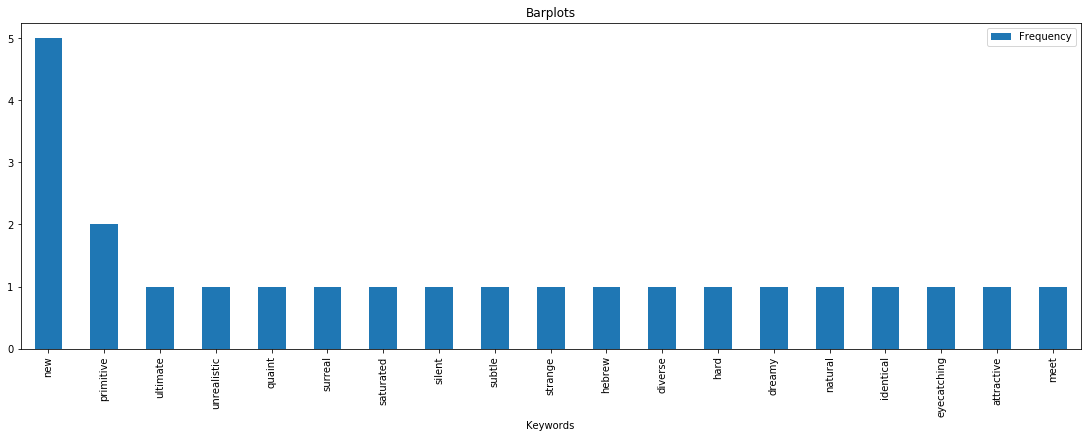

In [57]:
# Visualizing
MM_AD.plot.bar(x = "Keywords", y = "Frequency", rot = 90, title = "Barplots", figsize = (19,6));

### Mad Goat Facebook Advertisement
![MG Facebook](MG_fb.png)

In [58]:
MG_file = pd.read_csv("/Users/s2park2018/Desktop/DH101-Project/Leather Bag Facebook Advertisement - Mad Goat.csv", sep = ",")
MG_file.head()

,Date,Original Content,Translation
0,6/12/2019,[Dual Top Canvas Tote Bag]\n\n고트스킨&캔버스 소재 남성 토...,[Dual Top Canvas Tote Bag]\n\nGoatskin & Canva...
1,6/9/2019,\n[Dual Top Canvas Tote Bag]\n\n고트스킨&캔버스 소재 남성...,[Dual Top Canvas Tote Bag]\n\nGoatskin & Canva...
2,6/6/2019,\n[Dual Top Canvas Tote Bag]\n\n고트스킨&캔버스 소재 남성...,[Dual Top Canvas Tote Bag]\n\nGoatskin & Canva...
3,6/6/2019,\n[Dual Top Canvas Tote Bag]\n\n고트스킨&캔버스 소재 남성...,[Dual Top Canvas Tote Bag]\n\nGoatskin & Canva...
4,6/4/2019,[Herringbone Canvas Shopper Bag]\n\n일상이 여행이 되는...,[Herringbone Canvas Shopper Bag]\n\n#Picnic ba...


In [59]:
MG_file = MG_file["Translation"].apply(remove_digits)

In [60]:
# Collecting plain text for processing
MG_text = ' '.join(MG_file)
MG_text

"[Dual Top Canvas Tote Bag]\n\nGoatskin & Canvas male tote bag\n\nIf you have a lot of stuff use a shoulder strap.\nTry it on easily.\n\n* Product information http://bit.ly/VuVdh\n* Black khaki  colors\n* Minimize dust content using fabric\n* Removable shoulder straps\n* Ultralightweight tote bag\u200b in Goatskin & Canvas [Dual Top Canvas Tote Bag]\n\nGoatskin & Canvas male tote bag\n\nIf you have a lot of stuff use a shoulder strap.\nTry it on easily.\n\n* Product information http://bit.ly/VuVdh\n* Black khaki  colors\n* Minimize dust content using fabric\n* Removable shoulder straps\n* Ultralightweight tote bag\u200b in Goatskin & Canvas [Dual Top Canvas Tote Bag]\n\nGoatskin & Canvas male tote bag\n\nIf you have a lot of stuff use a shoulder strap.\nTry it on easily.\n\n* Product information http://bit.ly/VuVdh\n* Black khaki  colors\n* Minimize dust content using fabric\n* Removable shoulder straps\n* Ultralightweight tote bag\u200b in Goatskin & Canvas [Dual Top Canvas Tote Bag]\

In [61]:
# Removing URL
import re
MG_text = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", MG_text)

In [62]:
# Lemmatizing
nlp = spacy.load("en_core_web_lg")
def lemmatize(MG_text): 
    words = ' '.join(MG_text)
    doc = nlp(words)
    return [token.lemma_ for token in doc]
MG_ad = lemmatize(MG_text.split())
print(MG_ad)

['[', 'Dual', 'Top', 'Canvas', 'Tote', 'Bag', ']', 'Goatskin', '&', 'Canvas', 'male', 'tote', 'bag', 'if', '-PRON-', 'have', 'a', 'lot', 'of', 'stuff', 'use', 'a', 'shoulder', 'strap', '.', 'try', '-PRON-', 'on', 'easily', '.', '*', 'product', 'information', '*', 'black', 'khaki', 'color', '*', 'minimize', 'dust', 'content', 'use', 'fabric', '*', 'removable', 'shoulder', 'strap', '*', 'Ultralightweight', 'tote', 'bag\u200b', 'in', 'Goatskin', '&', 'Canvas', '[', 'Dual', 'Top', 'Canvas', 'Tote', 'Bag', ']', 'Goatskin', '&', 'Canvas', 'male', 'tote', 'bag', 'if', '-PRON-', 'have', 'a', 'lot', 'of', 'stuff', 'use', 'a', 'shoulder', 'strap', '.', 'try', '-PRON-', 'on', 'easily', '.', '*', 'product', 'information', '*', 'black', 'khaki', 'color', '*', 'minimize', 'dust', 'content', 'use', 'fabric', '*', 'removable', 'shoulder', 'strap', '*', 'Ultralightweight', 'tote', 'bag\u200b', 'in', 'Goatskin', '&', 'Canvas', '[', 'Dual', 'Top', 'Canvas', 'Tote', 'Bag', ']', 'Goatskin', '&', 'Canvas', 

In [63]:
# Removing Punctuation
for char in punctuation: 
    MG_text = MG_text.replace(char, "")
    MG_text = MG_text.replace('”', "")
    MG_text = MG_text.replace('“',"")
MG_ad = lemmatize(MG_text.lower().split())
print(MG_ad)

['dual', 'top', 'canvas', 'tote', 'bag', 'goatskin', 'canvas', 'male', 'tote', 'bag', 'if', '-PRON-', 'have', 'a', 'lot', 'of', 'stuff', 'use', 'a', 'shoulder', 'strap', 'try', '-PRON-', 'on', 'easily', 'product', 'information', 'black', 'khaki', 'color', 'minimize', 'dust', 'content', 'use', 'fabric', 'removable', 'shoulder', 'strap', 'ultralightweight', 'tote', 'bag\u200b', 'in', 'goatskin', 'canvas', 'dual', 'top', 'canvas', 'tote', 'bag', 'goatskin', 'canvas', 'male', 'tote', 'bag', 'if', '-PRON-', 'have', 'a', 'lot', 'of', 'stuff', 'use', 'a', 'shoulder', 'strap', 'try', '-PRON-', 'on', 'easily', 'product', 'information', 'black', 'khaki', 'color', 'minimize', 'dust', 'content', 'use', 'fabric', 'removable', 'shoulder', 'strap', 'ultralightweight', 'tote', 'bag\u200b', 'in', 'goatskin', 'canvas', 'dual', 'top', 'canvas', 'tote', 'bag', 'goatskin', 'canvas', 'male', 'tote', 'bag', 'if', '-PRON-', 'have', 'a', 'lot', 'of', 'stuff', 'use', 'a', 'shoulder', 'strap', 'try', '-PRON-', '

In [64]:
nlp = spacy.load("en_core_web_lg")
doc = nlp(" ".join(MG_ad))

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop)

dual dual ADJ JJ amod xxxx True False
top top ADJ JJ amod xxx True True
canvas canvas NOUN NN compound xxxx True False
tote tote NOUN NN compound xxxx True False
bag bag NOUN NN compound xxx True False
goatskin goatskin NOUN NN compound xxxx True False
canvas canvas NOUN NN compound xxxx True False
male male NOUN NN compound xxxx True False
tote tote NOUN NN compound xxxx True False
bag bag NOUN NN ROOT xxx True False
if if ADP IN mark xx True True
-PRON- -PRON- PUNCT : nsubj -XXXX- False False
have have VERB VBP advcl xxxx True True
a a DET DT det x True True
lot lot NOUN NN dobj xxx True False
of of ADP IN prep xx True True
stuff stuff NOUN NN pobj xxxx True False
use use VERB VB ROOT xxx True False
a a DET DT det x True True
shoulder shoulder NOUN NN compound xxxx True False
strap strap NOUN NN nsubj xxxx True False
try try VERB VB xcomp xxx True False
-PRON- -PRON- PUNCT : punct -XXXX- False False
on on ADP IN prep xx True True
easily easily ADV RB advmod xxxx True False
product pr

a a DET DT det x True True
point point NOUN NN dobj xxxx True False
unique unique ADJ JJ amod xxxx True False
retro retro ADJ JJ nmod xxxx True False
red red ADJ JJ amod xxx True False
color color NOUN NN nmod xxxx True False
ultralight ultralight NOUN NN nmod xxxx True False
gotskin gotskin NOUN NN nmod xxxx True False
material material NOUN NN nmod xxxx True False
removable removable ADJ JJ amod xxxx True False
shoulder shoulder NOUN NN compound xxxx True False
strap strap NOUN NN dobj xxxx True False
three three NUM CD nummod xxxx True True
way way NOUN NN npadvmod xxx True False
tape tape NOUN NN nsubj xxxx True False
clutch clutch NOUN NN dep xxxx True False
bag bag NOUN NN dobj xxx True False
the the DET DT det xxx True True
feminine feminine ADJ JJ amod xxxx True False
curve curve NOUN NN nsubj xxxx True False
and and CCONJ CC cc xxx True True
tape tape NOUN NN compound xxxx True False
detail detail NOUN NN conj xxxx True False
stand stand VERB VB ROOT xxxx True False
out out PA

comfort comfort NOUN NN compound xxxx True False
harringbone harringbone NOUN NN compound xxxx True False
pattern pattern NOUN NN compound xxxx True False
canvas canvas NOUN NN nmod xxxx True False
material material NOUN NN compound xxxx True False
light light ADJ JJ pobj xxxx True False
canvas canvas NOUN NN compound xxxx True False
gotskin gotskin X FW compound xxxx True False
inout inout NOUN NN compound xxxx True False
twoway twoway NOUN NN compound xxxx True False
wear wear NOUN NN nsubj xxxx True False
may may VERB MD aux xxx True True
audit audit VERB VB ROOT xxxx True False
in in ADP IN prep xx True True
progress progress NOUN NN pobj xxxx True False
three three NUM CD nummod xxxx True True
way way NOUN NN npadvmod xxx True False
tape tape NOUN NN nsubj xxxx True False
clutch clutch NOUN NN advcl xxxx True False
bag bag NOUN NN dobj xxx True False
the the DET DT det xxx True True
feminine feminine ADJ JJ amod xxxx True False
curve curve NOUN NN nsubj xxxx True False
and and CCO

bag bag NOUN NN dobj xxx True False
if if ADP IN mark xx True True
-PRON- -PRON- PUNCT : nsubj -XXXX- False False
have have VERB VBP advcl xxxx True True
a a DET DT det x True True
lot lot NOUN NN dobj xxx True False
of of ADP IN prep xx True True
stuff stuff NOUN NN pobj xxxx True False
use use VERB VB ROOT xxx True False
a a DET DT det x True True
shoulder shoulder NOUN NN compound xxxx True False
strap strap NOUN NN nsubj xxxx True False
try try VERB VB xcomp xxx True False
-PRON- -PRON- PUNCT : punct -XXXX- False False
on on ADP IN prep xx True True
easily easily ADV RB advmod xxxx True False
product product NOUN NN nmod xxxx True False
information information NOUN NN nmod xxxx True False
black black ADJ JJ amod xxxx True False
khaki khaki NOUN NN amod xxxx True False
color color NOUN NN nsubj xxxx True False
minimize minimize VERB VB pcomp xxxx True False
dust dust NOUN NN compound xxxx True False
content content NOUN NN nsubj xxxx True False
use use VERB VB ROOT xxx True False
fa

audit audit VERB VB ROOT xxxx True False
in in ADP IN prep xx True True
progress progress NOUN NN compound xxxx True False
herringbone herringbone NOUN NN compound xxxx True False
canvas canvas NOUN NN compound xxxx True False
shopper shopper NOUN NN compound xxxx True False
bag bag NOUN NN compound xxx True False
picnic picnic NOUN NN compound xxxx True False
bag bag NOUN NN pobj xxx True False
for for ADP IN prep xxx True True
everyday everyday ADJ JJ amod xxxx True False
travel travel NOUN NN compound xxxx True False
womens womens ADJ JJ compound xxxx True False
bag bag NOUN NN pobj xxx True False
for for ADP IN prep xxx True True
summer summer NOUN NN compound xxxx True False
comfort comfort NOUN NN compound xxxx True False
harringbone harringbone NOUN NN compound xxxx True False
pattern pattern NOUN NN compound xxxx True False
canvas canvas NOUN NN nmod xxxx True False
material material NOUN NN compound xxxx True False
light light ADJ JJ pobj xxxx True False
canvas canvas NOUN NN 

In [65]:
d = []
for token in doc:
    d.append((token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop))

MG_adout = pd.DataFrame(d, columns=("text", "lemma", "pos", "tag", "dep", "shape", 
                               "is_alpha", "is_stop"))
MG_adout.head()

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop
0,dual,dual,ADJ,JJ,amod,xxxx,True,False
1,top,top,ADJ,JJ,amod,xxx,True,True
2,canvas,canvas,NOUN,NN,compound,xxxx,True,False
3,tote,tote,NOUN,NN,compound,xxxx,True,False
4,bag,bag,NOUN,NN,compound,xxx,True,False


In [66]:
MG_adstop = list(np.where(MG_adout["is_stop"] == False)[0])
MG_adout = MG_adout.iloc[MG_adstop]

In [67]:
# Extracting Adjectives
MG_adadj = MG_adout[MG_adout["pos"] == "ADJ"]
MG_adadj

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop
0,dual,dual,ADJ,JJ,amod,xxxx,True,False
27,black,black,ADJ,JJ,amod,xxxx,True,False
35,removable,removable,ADJ,JJ,amod,xxxx,True,False
38,ultralightweight,ultralightweight,ADJ,JJ,compound,xxxx,True,False
44,dual,dual,ADJ,JJ,amod,xxxx,True,False
71,black,black,ADJ,JJ,amod,xxxx,True,False
79,removable,removable,ADJ,JJ,amod,xxxx,True,False
82,ultralightweight,ultralightweight,ADJ,JJ,compound,xxxx,True,False
88,dual,dual,ADJ,JJ,amod,xxxx,True,False
115,black,black,ADJ,JJ,amod,xxxx,True,False


In [68]:
# Counting Frequency
MG_adadj = MG_adadj["lemma"].value_counts()
MG_adadj

removable           25
womens              16
retro               16
unique              16
feminine            16
light               16
red                 16
everyday            16
black               10
ultralightweight     9
dual                 9
slim                 2
mans                 2
good                 2
rigid                1
available            1
lightweighted        1
male                 1
Name: lemma, dtype: int64

In [69]:
# Transforming to Dictionary 
MG_AD = {k:v for k, v in MG_adadj.iteritems()}
print(MG_AD)

{'removable': 25, 'womens': 16, 'retro': 16, 'unique': 16, 'feminine': 16, 'light': 16, 'red': 16, 'everyday': 16, 'black': 10, 'ultralightweight': 9, 'dual': 9, 'slim': 2, 'mans': 2, 'good': 2, 'rigid': 1, 'available': 1, 'lightweighted': 1, 'male': 1}


In [70]:
MG_AD = pd.DataFrame.from_dict({'removable': 25, 'light': 16, 'everyday': 16, 'womens': 16, 'red': 16, 'retro': 16, 'unique': 16, 'feminine': 16, 'black': 10, 'dual': 9, 'ultralightweight': 9, 'mans': 2, 'good': 2, 'slim': 2, 'male': 1, 'rigid': 1, 'lightweighted': 1, 'available': 1}, orient='index')
MG_AD = MG_AD.reset_index()
MG_AD = MG_AD.rename(columns={"index":"Keywords", 0:"Frequency"})
MG_AD

,Keywords,Frequency
0,removable,25
1,light,16
2,everyday,16
3,womens,16
4,red,16
5,retro,16
6,unique,16
7,feminine,16
8,black,10
9,dual,9


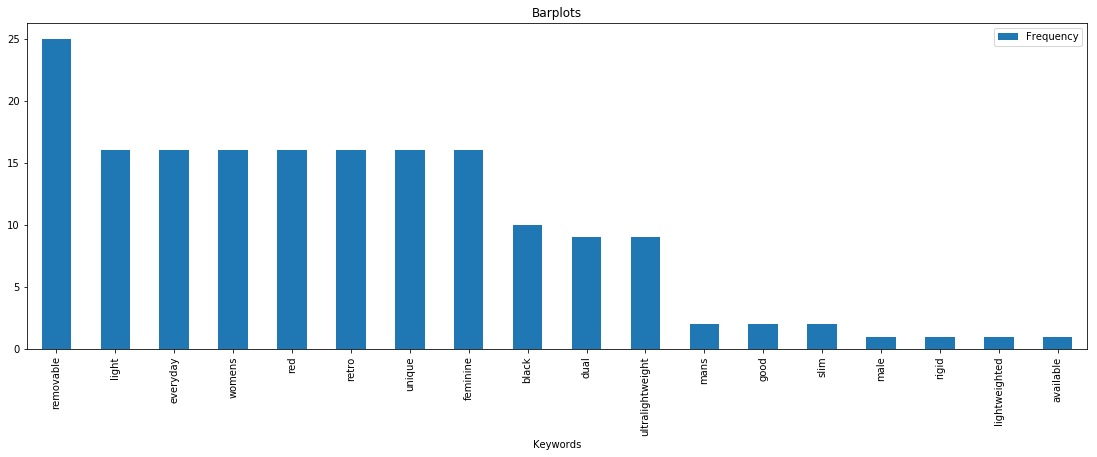

In [71]:
# Visualizing
MG_AD.plot.bar(x = "Keywords", y = "Frequency", rot = 90, title = "Barplots", figsize = (19,6));

 ### Avam Instagram Advertisement
 ![Avam Instagram](AV_ins.png)

In [72]:
AV_file = pd.read_csv("/Users/s2park2018/Desktop/DH101-Project/Leather Bag Facebook Advertisement - Avam.csv", sep = ",")
AV_file.head()

,Date,Original Content,Translation
0,6/16/2019,가벼운 블랙 재킷에 데님팬츠와 함께 클래식한 #캐롤린백 의 조합\n심플하고 세련되인...,A combination of classic #Carolyn bag with lig...
1,6/16/2019,모나미백은 캔버스소재와 가죽소재가 섞인 하드한 타입의 #버킷백 입니다. 편안한 스타...,Monami bag is a hard type # bucket bag that mi...
2,6/15/2019,화이트 블라우스와 스커트 그리고 화이트 #캐롤린백 을 매치한 스타일리스트 쭉 뻗은 ...,White blouses skirts and white #Carolyn bag ma...
3,6/9/2019,심플한 원피스나 다양한 데일리룩과 무난하게 매치하기 좋은 모나미백이죠,It's a simple dress a variety of daily looks a...
4,6/9/2019,My Bag Today \n외출하기 직전 여러분의 백에는 무엇이 담기나요? \n우연...,My Bag Today \nJust before going out what does...


In [73]:
AV_file = AV_file["Translation"].apply(remove_digits)

In [74]:
# Collecting plain text for processing
AV_text = ' '.join(AV_file)
AV_text

'A combination of classic #Carolyn bag with light black jacket and denim pants.\nSimple and refined :)\nThank you. Monami bag is a hard type # bucket bag that mixes canvas and leather. Create a natural weekend look that matches your comfortable style. White blouses skirts and white #Carolyn bag matching stylists. What\'s that stretch of legs?\nGet into Carolynback\'s charm from casual Daily Look to Dressy Evening Look. It\'s a simple dress a variety of daily looks and a nice monami bag to match. My Bag Today \nJust before going out what does your bag contain? \nI\'ve imagined what kind of items each person would have when I dropped my bag by accident. \nIt\'s a pleasure to see things that change as much as your tastes such as lipstick books smartphones and booty. \nBags hold a part of you\nSo I think it\'s more than just a fashion item. \nAbam Carolyn Bag will be a good friend to make a new story together every day. Mon Ami Bag\nIt\'s Mon ami Bag. Unique design modernity and cheerful m

In [75]:
# Lemmatizing
nlp = spacy.load("en_core_web_lg")
def lemmatize(AV_text): 
    words = ' '.join(AV_text)
    doc = nlp(words)
    return [token.lemma_ for token in doc]
AV_ad = lemmatize(AV_text.split())
print(AV_ad)

['a', 'combination', 'of', 'classic', '#', 'Carolyn', 'bag', 'with', 'light', 'black', 'jacket', 'and', 'denim', 'pant', '.', 'simple', 'and', 'refined', ':)', 'thank', '-PRON-', '.', 'Monami', 'bag', 'be', 'a', 'hard', 'type', '#', 'bucket', 'bag', 'that', 'mix', 'canvas', 'and', 'leather', '.', 'create', 'a', 'natural', 'weekend', 'look', 'that', 'match', '-PRON-', 'comfortable', 'style', '.', 'white', 'blouse', 'skirt', 'and', 'white', '#', 'Carolyn', 'bag', 'match', 'stylist', '.', 'what', 'be', 'that', 'stretch', 'of', 'leg', '?', 'Get', 'into', 'Carolynback', "'s", 'charm', 'from', 'casual', 'Daily', 'look', 'to', 'Dressy', 'Evening', 'Look', '.', '-PRON-', 'be', 'a', 'simple', 'dress', 'a', 'variety', 'of', 'daily', 'look', 'and', 'a', 'nice', 'monami', 'bag', 'to', 'match', '.', '-PRON-', 'bag', 'today', 'just', 'before', 'go', 'out', 'what', 'do', '-PRON-', 'bag', 'contain', '?', '-PRON-', 'have', 'imagine', 'what', 'kind', 'of', 'item', 'each', 'person', 'would', 'have', 'whe

In [76]:
# Removing Punctuation
for char in punctuation: 
    AV_text = AV_text.replace(char, "")
    AV_text = AV_text.replace('”', "")
    AV_text = AV_text.replace('“',"")
AV_ad = lemmatize(AV_text.lower().split())
print(AV_ad)

['a', 'combination', 'of', 'classic', 'carolyn', 'bag', 'with', 'light', 'black', 'jacket', 'and', 'denim', 'pant', 'simple', 'and', 'refined', 'thank', '-PRON-', 'monami', 'bag', 'be', 'a', 'hard', 'type', 'bucket', 'bag', 'that', 'mix', 'canvas', 'and', 'leather', 'create', 'a', 'natural', 'weekend', 'look', 'that', 'match', '-PRON-', 'comfortable', 'style', 'white', 'blouse', 'skirt', 'and', 'white', 'carolyn', 'bag', 'match', 'stylist', 'what', 's', 'that', 'stretch', 'of', 'leg', 'get', 'into', 'carolynbacks', 'charm', 'from', 'casual', 'daily', 'look', 'to', 'dressy', 'evening', 'look', '-PRON-', 'a', 'simple', 'dress', 'a', 'variety', 'of', 'daily', 'look', 'and', 'a', 'nice', 'monami', 'bag', 'to', 'match', '-PRON-', 'bag', 'today', 'just', 'before', 'go', 'out', 'what', 'do', '-PRON-', 'bag', 'contain', '-PRON-', 'have', 'imagine', 'what', 'kind', 'of', 'item', 'each', 'person', 'would', 'have', 'when', 'i', 'drop', '-PRON-', 'bag', 'by', 'accident', '-PRON-', 'a', 'pleasure',

In [77]:
nlp = spacy.load("en_core_web_lg")
doc = nlp(" ".join(AV_ad))

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop)

a a DET DT det x True True
combination combination NOUN NN ROOT xxxx True False
of of ADP IN prep xx True True
classic classic ADJ JJ amod xxxx True False
carolyn carolyn PROPN NNP compound xxxx True False
bag bag NOUN NN pobj xxx True False
with with ADP IN prep xxxx True True
light light ADJ JJ amod xxxx True False
black black ADJ JJ amod xxxx True False
jacket jacket NOUN NN pobj xxxx True False
and and CCONJ CC cc xxx True True
denim denim NOUN NN nmod xxxx True False
pant pant NOUN NN conj xxxx True False
simple simple ADJ JJ amod xxxx True False
and and CCONJ CC cc xxx True True
refined refined ADJ JJ conj xxxx True False
thank thank NOUN NN nmod xxxx True False
-PRON- -PRON- PUNCT : punct -XXXX- False False
monami monami ADJ JJ compound xxxx True False
bag bag NOUN NN nsubj xxx True False
be be VERB VB ROOT xx True True
a a DET DT det x True True
hard hard ADJ JJ amod xxxx True False
type type NOUN NN compound xxxx True False
bucket bucket NOUN NN compound xxxx True False
bag ba

belt belt NOUN NN conj xxxx True False
and and CCONJ CC cc xxx True True
black black ADJ JJ amod xxxx True False
carolyn carolyn PROPN NNP compound xxxx True False
bag bag NOUN NN conj xxx True False
as as ADP IN prep xx True True
tote tote NOUN NN compound xxxx True False
applaud applaud NOUN NN pobj xxxx True False
megu megu VERB VBZ xcomp xxxx True False
the the DET DT det xxx True True
model model NOUN NN dobj xxxx True False
who who PRON WP nsubj xxx True True
produce produce VERB VBP relcl xxxx True False
the the DET DT det xxx True True
daily daily ADJ JJ amod xxxx True False
look look NOUN NN dobj xxxx True False
try try VERB VB acl xxx True False
retro retro ADJ JJ amod xxxx True False
sensitivity sensitivity NOUN NN dobj xxxx True False
with with ADP IN prep xxxx True True
vintage vintage ADJ JJ amod xxxx True False
goldrimmed goldrimmed ADJ JJ compound xxxx True False
spectacle spectacle NOUN NN pobj xxxx True False
-PRON- -PRON- PUNCT : punct -XXXX- False False
a a DET DT d

season season NOUN NN pobj xxxx True False
and and CCONJ CC cc xxx True True
burgundy burgundy NOUN NN nsubj xxxx True False
can can VERB MD aux xxx True True
easily easily ADV RB advmod xxxx True False
match match VERB VB conj xxxx True False
deepcolored deepcolored ADJ JJ amod xxxx True False
outfits outfits NOUN NN compound xxxx True False
mustard mustard NOUN NN compound xxxx True False
color color NOUN NN dobj xxxx True False
can can VERB MD aux xxx True True
also also ADV RB advmod xxxx True True
be be VERB VB conj xx True True
a a DET DT det x True True
point point NOUN NN attr xxxx True False
of of ADP IN prep xx True True
life life NOUN NN pobj xxxx True False
do do VERB VBP aux xx True True
not not ADV RB neg xxx True True
think think VERB VB ROOT xxxx True False
hard hard ADV RB advmod xxxx True False
-PRON- -PRON- PUNCT : punct -XXXX- False False
the the DET DT det xxx True True
simple simple ADJ JJ amod xxxx True False
way way NOUN NN npadvmod xxx True False
to to PART TO 

new new ADJ JJ amod xxx True False
song song NOUN NN pobj xxxx True False
decorate decorate VERB VB advcl xxxx True False
-PRON- -PRON- PUNCT : punct -XXXX- False False
way way NOUN NN dobj xxx True False
to to PART TO aux xx True True
work work VERB VB relcl xxxx True False
with with ADP IN prep xxxx True True
a a DET DT det x True True
white white ADJ JJ amod xxxx True False
color color NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
mon mon X FW compound xxx True False
ami ami X FW compound xxx True False
bag bag NOUN NN pobj xxx True False
at at ADP IN prep xx True True
night night NOUN NN nmod xxxx True False
white white ADJ JJ amod xxxx True False
dress dress NOUN NN pobj xxxx True False
with with ADP IN prep xxxx True True
jacket jacket NOUN NN nmod xxxx True False
brown brown ADJ JJ amod xxxx True False
leather leather NOUN NN compound xxxx True False
shoe shoe NOUN NN pobj xxxx True False
and and CCONJ CC cc xxx True True
monamibag monamibag ADJ JJ nmod xxxx True F

preorder preorder NOUN NN dobj xxxx True False
-PRON- -PRON- NOUN NNS punct -XXXX- False False
-PRON- -PRON- PUNCT : punct -XXXX- False False
a a DET DT det x True True
daily daily ADJ JJ amod xxxx True False
bag bag NOUN NN dobj xxx True False
that that DET WDT nsubj xxxx True True
will will VERB MD aux xxxx True True
go go VERB VB relcl xx True True
particularly particularly ADV RB advmod xxxx True False
well well ADV RB advmod xxxx True True
with with ADP IN prep xxxx True True
the the DET DT det xxx True True
lighterdressing lighterdressing NOUN NN compound xxxx True False
season season NOUN NN pobj xxxx True False
-PRON- -PRON- PUNCT : punct -XXXX- False False
make make VERB VB dep xxxx True True
for for ADP IN prep xxx True True
woman woman NOUN NN pobj xxxx True False
who who PRON WP nsubj xxx True True
be be VERB VBP relcl xx True True
a a DET DT det x True True
little little ADJ JJ npadvmod xxxx True False
more more ADV RBR advmod xxxx True True
mature mature ADJ JJ acomp xxxx

the the DET DT det xxx True True
lookbook lookbook NOUN NN appos xxxx True False
-PRON- -PRON- PUNCT : punct -XXXX- False False
be be VERB VB ROOT xx True True
so so ADV RB advmod xx True True
popular popular ADJ JJ acomp xxxx True False
that that ADP IN mark xxxx True True
-PRON- -PRON- PUNCT : punct -XXXX- False False
even even ADV RB advmod xxxx True True
put put VERB VBN ccomp xxx True True
in in ADP IN prt xx True True
preorder preorder NOUN NN dobj xxxx True False
-PRON- -PRON- NOUN NNS punct -XXXX- False False
-PRON- -PRON- PUNCT : punct -XXXX- False False
a a DET DT det x True True
daily daily ADJ JJ amod xxxx True False
bag bag NOUN NN dobj xxx True False
that that DET WDT nsubj xxxx True True
will will VERB MD aux xxxx True True
go go VERB VB relcl xx True True
particularly particularly ADV RB advmod xxxx True False
well well ADV RB advmod xxxx True True
with with ADP IN prep xxxx True True
the the DET DT det xxx True True
lighterdressing lighterdressing NOUN NN compound xxxx

strap strap NOUN NN pobj xxxx True False
and and CCONJ CC cc xxx True True
double double ADJ JJ amod xxxx True False
strap strap NOUN NN conj xxxx True False
for for ADP IN prep xxx True True
increase increase NOUN NN compound xxxx True False
utilization utilization NOUN NN pobj xxxx True False
this this DET DT nsubj xxxx True True
be be VERB VB ROOT xx True True
abams abams ADJ JJ compound xxxx True False
bag bag NOUN NN attr xxx True False
that that DET WDT dobj xxxx True True
i i PRON PRP nsubj x True True
would would VERB MD aux xxxx True True
like like VERB VB relcl xxxx True False
to to PART TO aux xx True True
recommend recommend VERB VB xcomp xxxx True False
to to ADP IN prep xx True True
those those DET DT pobj xxxx True True
who who PRON WP nsubj xxx True True
want want VERB VBP relcl xxxx True False
to to PART TO aux xx True True
complete complete VERB VB xcomp xxxx True False
-PRON- -PRON- PUNCT : punct -XXXX- False False
own own ADJ JJ amod xxx True True
style style NOUN N

battery battery NOUN NN pobj xxxx True False
and and CCONJ CC cc xxx True True
various various ADJ JJ amod xxxx True True
prop prop NOUN NN conj xxxx True False
that that DET WDT nsubj xxxx True True
be be VERB VBP relcl xx True True
not not ADV RB neg xxx True True
disorganized disorganized ADJ JJ amod xxxx True False
cheerful cheerful ADJ JJ amod xxxx True False
mood mood NOUN NN attr xxxx True False
and and CCONJ CC cc xxx True True
refine refine VERB VB conj xxxx True False
-PRON- -PRON- PUNCT : punct -XXXX- False False
have have VERB VBP conj xxxx True True
to to PART TO aux xx True True
be be VERB VB xcomp xx True True
luxurious luxurious ADJ JJ acomp xxxx True False
when when ADV WRB advmod xxxx True True
-PRON- -PRON- PUNCT : punct -XXXX- False False
hear hear VERB VB advcl xxxx True False
-PRON- -PRON- PUNCT : dobj -XXXX- False False
in in ADP IN prep xx True True
real real ADJ JJ amod xxxx True False
so so ADV RB advmod xx True True
after after ADP IN prep xxxx True True
a a 

that that DET WDT dobj xxxx True True
i i PRON PRP nsubj x True True
would would VERB MD aux xxxx True True
like like VERB VB relcl xxxx True False
to to PART TO aux xx True True
recommend recommend VERB VB xcomp xxxx True False
to to ADP IN prep xx True True
those those DET DT pobj xxxx True True
who who PRON WP nsubj xxx True True
want want VERB VBP relcl xxxx True False
to to PART TO aux xx True True
complete complete VERB VB xcomp xxxx True False
-PRON- -PRON- PUNCT : punct -XXXX- False False
own own ADJ JJ amod xxx True True
style style NOUN NN dobj xxxx True False
that that DET WDT nsubj xxxx True True
be be VERB VB relcl xx True True
more more ADV RBR advmod xxxx True True
complete complete ADJ JJ amod xxxx True False
a a DET DT det x True True
new new ADJ JJ amod xxx True False
season season NOUN NN attr xxxx True False
a a DET DT det x True True
new new ADJ JJ amod xxx True False
bag bag NOUN NN nsubjpass xxx True False
of of ADP IN prep xx True True
avam avam NOUN NN pobj xxx

strap strap NOUN NN conj xxxx True False
to to PART TO aux xx True True
take take VERB VB advcl xxxx True True
advantage advantage NOUN NN dobj xxxx True False
of of ADP IN prep xx True True
-PRON- -PRON- PUNCT : pobj -XXXX- False False
as as ADP IN prep xx True True
new new ADJ JJ amod xxx True False
bag bag NOUN NN pobj xxx True False
every every DET DT det xxxx True True
day day NOUN NN npadvmod xxx True False
for for ADP IN prep xxx True True
styling styling NOUN NN pobj xxxx True False
why why ADV WRB advmod xxx True True
do do VERB VBP aux xx True True
not not ADV RB neg xxx True True
-PRON- -PRON- PUNCT : punct -XXXX- False False
do do VERB VB ROOT xx True True
a a DET DT det x True True
french french ADJ JJ amod xxxx True False
chic chic ADJ JJ amod xxxx True False
look look NOUN NN dobj xxxx True False
with with ADP IN prep xxxx True True
flat flat ADJ JJ amod xxxx True False
shoe shoe NOUN NN pobj xxxx True False
-PRON- -PRON- PUNCT : punct -XXXX- False False
can can VERB MD 

will will VERB MD aux xxxx True True
be be VERB VB ccomp xx True True
like like ADP IN prep xxxx True False
a a DET DT det x True True
close close ADJ JJ amod xxxx True False
friend friend NOUN NN compound xxxx True False
carolyn carolyn PROPN NNP pobj xxxx True False
the the DET DT det xxx True True
first first ADJ JJ amod xxxx True True
bag bag NOUN NN nsubj xxx True False
for for ADP IN prep xxx True True
the the DET DT det xxx True True
ss ss NOUN NN amod xx True False
season season NOUN NN pobj xxxx True False
at at ADP IN prep xx True True
night night NOUN NN pobj xxxx True False
with with ADP IN prep xxxx True True
a a DET DT det x True True
powerful powerful ADJ JJ amod xxxx True False
straight straight ADJ JJ amod xxxx True False
shape shape NOUN NN pobj xxxx True False
a a DET DT det x True True
wellmade wellmade NOUN NN compound xxxx True False
handle handle NOUN NN appos xxxx True False
and and CCONJ CC cc xxx True True
a a DET DT det x True True
classic classic ADJ JJ amod

would would VERB MD aux xxxx True True
like like VERB VB relcl xxxx True False
to to PART TO aux xx True True
recommend recommend VERB VB xcomp xxxx True False
to to ADP IN prep xx True True
those those DET DT pobj xxxx True True
who who PRON WP nsubj xxx True True
want want VERB VBP relcl xxxx True False
to to PART TO aux xx True True
complete complete VERB VB xcomp xxxx True False
-PRON- -PRON- PUNCT : punct -XXXX- False False
own own ADJ JJ amod xxx True True
style style NOUN NN dobj xxxx True False
that that DET WDT nsubj xxxx True True
be be VERB VB relcl xx True True
more more ADV RBR advmod xxxx True True
complete complete ADJ JJ amod xxxx True False
carolyn carolyn PROPN NNP attr xxxx True False
the the DET DT det xxx True True
first first ADJ JJ amod xxxx True True
bag bag NOUN NN attr xxx True False
for for ADP IN prep xxx True True
the the DET DT det xxx True True
ss ss NOUN NN amod xx True False
season season NOUN NN pobj xxxx True False
at at ADP IN prep xx True True
night

In [78]:
d = []
for token in doc:
    d.append((token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop))

AV_adout = pd.DataFrame(d, columns=("text", "lemma", "pos", "tag", "dep", "shape", 
                               "is_alpha", "is_stop"))
AV_adout.head()

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop
0,a,a,DET,DT,det,x,True,True
1,combination,combination,NOUN,NN,ROOT,xxxx,True,False
2,of,of,ADP,IN,prep,xx,True,True
3,classic,classic,ADJ,JJ,amod,xxxx,True,False
4,carolyn,carolyn,PROPN,NNP,compound,xxxx,True,False


In [79]:
AV_adstop = list(np.where(AV_adout["is_stop"] == False)[0])
AV_adout = AV_adout.iloc[AV_adstop]

In [80]:
# Extracting Adjectives
AV_adadj = AV_adout[AV_adout["pos"] == "ADJ"]
AV_adadj.head()

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop
3,classic,classic,ADJ,JJ,amod,xxxx,True,False
7,light,light,ADJ,JJ,amod,xxxx,True,False
8,black,black,ADJ,JJ,amod,xxxx,True,False
13,simple,simple,ADJ,JJ,amod,xxxx,True,False
15,refined,refined,ADJ,JJ,conj,xxxx,True,False


In [81]:
# Counting Frequency
AV_adadj = AV_adadj["lemma"].value_counts()
AV_adadj

new             30
white           26
black           24
classic         14
double          13
cheerful        12
daily           12
unique          10
casual          10
confident        9
satisfied        9
simple           9
close            8
monamie          8
standard         7
straight         7
abams            7
powerful         7
brown            7
bright           7
sure             7
complete         7
ill              7
round            6
perfect          6
good             6
natural          5
luxurious        5
chic             5
cool             5
                ..
strange          2
favorite         2
stick            2
monami           2
different        2
light            2
easy             2
lose             2
additional       1
monamibag        1
sunny            1
orange           1
uncountable      1
dressy           1
crispy           1
beloved          1
lovely           1
refined          1
avams            1
vivid            1
aesthetic        1
blue        

In [82]:
# Transforming to Dictionary and Removing Translation Error
AV_AD = {k:v for k, v in AV_adadj.iteritems()}
try: 
    del AV_AD["carolynbacks"]
    del AV_AD["monamibag"]
    del AV_AD["monamie"]
    del AV_AD["abams"]
    del AV_AD["avams"]
except KeyError: 
    print("key item not found")
    
print(AV_AD)

{'new': 30, 'white': 26, 'black': 24, 'classic': 14, 'double': 13, 'cheerful': 12, 'daily': 12, 'unique': 10, 'casual': 10, 'confident': 9, 'satisfied': 9, 'simple': 9, 'close': 8, 'standard': 7, 'straight': 7, 'powerful': 7, 'brown': 7, 'bright': 7, 'sure': 7, 'complete': 7, 'ill': 7, 'round': 6, 'perfect': 6, 'good': 6, 'natural': 5, 'luxurious': 5, 'chic': 5, 'cool': 5, 'mixed': 4, 'hard': 4, 'rare': 4, 'disorganized': 4, 'real': 4, 'mature': 4, 'auxiliary': 4, 'nice': 4, 'modern': 3, 'basic': 3, 'mini': 3, 'popular': 3, 'red': 3, 'comfortable': 3, 'architectural': 3, 'public': 3, 'denim': 3, 'solid': 3, 'long': 3, 'important': 3, 'flat': 3, 'oversized': 3, 'look': 3, 'impose': 3, 'little': 3, 'french': 3, 'deepcolored': 2, 'jard': 2, 'eyecatching': 2, 'vintage': 2, 'previous': 2, 'strange': 2, 'favorite': 2, 'stick': 2, 'monami': 2, 'different': 2, 'light': 2, 'easy': 2, 'lose': 2, 'additional': 1, 'sunny': 1, 'orange': 1, 'uncountable': 1, 'dressy': 1, 'crispy': 1, 'beloved': 1, '

In [83]:
AV_AD = pd.DataFrame.from_dict({'new': 30, 'white': 26, 'black': 24, 'classic': 14, 'double': 13, 'daily': 12, 'cheerful': 12, 'casual': 10, 'unique': 10, 'satisfied': 9, 'confident': 9, 'simple': 9, 'close': 8, 'straight': 7, 'standard': 7, 'complete': 7, 'powerful': 7, 'brown': 7, 'bright': 7, 'sure': 7, 'ill': 7, 'perfect': 6, 'good': 6, 'round': 6, 'cool': 5, 'natural': 5, 'luxurious': 5, 'chic': 5, 'auxiliary': 4, 'disorganized': 4, 'hard': 4, 'mixed': 4, 'mature': 4, 'rare': 4, 'real': 4, 'nice': 4, 'impose': 3, 'oversized': 3, 'red': 3, 'important': 3, 'modern': 3, 'little': 3, 'architectural': 3, 'flat': 3, 'solid': 3, 'public': 3, 'mini': 3, 'comfortable': 3, 'french': 3, 'basic': 3, 'long': 3, 'popular': 3, 'denim': 3, 'look': 3, 'deepcolored': 2, 'strange': 2, 'favorite': 2, 'different': 2, 'light': 2, 'stick': 2, 'easy': 2, 'lose': 2, 'eyecatching': 2, 'jard': 2, 'previous': 2, 'vintage': 2, 'monami': 2, 'goldrimmed': 1, 'additional': 1, 'refined': 1, 'dressy': 1, 'uncountable': 1, 'elegant': 1, 'blue': 1, 'retro': 1, 'beloved': 1, 'sharp': 1, 'orange': 1, 'clean': 1, 'aesthetic': 1, 'sunny': 1, 'gorgeous': 1, 'crispy': 1, 'key': 1, 'lovely': 1, 'vivid': 1}, orient='index')
AV_AD = AV_AD.reset_index()
AV_AD = AV_AD.rename(columns={"index":"Keywords", 0:"Frequency"})
AV_AD

,Keywords,Frequency
0,new,30
1,white,26
2,black,24
3,classic,14
4,double,13
5,daily,12
6,cheerful,12
7,casual,10
8,unique,10
9,satisfied,9


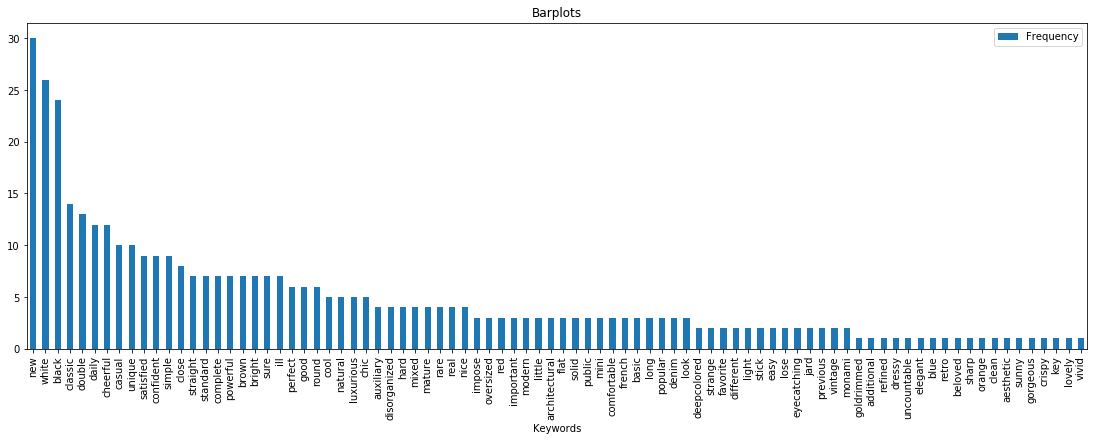

In [84]:
# Visualizing
AV_AD.plot.bar(x = "Keywords", y = "Frequency", rot = 90, title = "Barplots", figsize = (19,6));

### Comparison
#### Top Keywords
* Both 'daily' and 'everyday' are present ('everyday' from Mad Goat and 'daily' from Avam). Since they are synonyms, I will combine the two.

In [85]:
# Selecting top 15 keywords from each analysis
MM_top = MM_AD[0:15]
MG_top = MG_AD[0:15]
MG_top["Keywords"] = MG_top["Keywords"].replace({"everyday":"daily"})
AV_top = AV_AD[0:15]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [86]:
# Concatenating all keywords into one dataframe
Top_frames = [MM_top, MG_top, AV_top]
Top_keys = pd.concat(Top_frames)
Top_keys

,Keywords,Frequency
0,new,5
1,primitive,2
2,ultimate,1
3,unrealistic,1
4,quaint,1
5,surreal,1
6,saturated,1
7,silent,1
8,subtle,1
9,strange,1


In [87]:
# Searching for overlaps
Key_total = Top_keys["Keywords"].value_counts()

In [88]:
Key_total = {k:v for k, v in Key_total.iteritems()}
print(Key_total)

{'black': 2, 'unique': 2, 'daily': 2, 'new': 2, 'classic': 1, 'dual': 1, 'straight': 1, 'womens': 1, 'ultralightweight': 1, 'satisfied': 1, 'mans': 1, 'casual': 1, 'simple': 1, 'saturated': 1, 'surreal': 1, 'quaint': 1, 'subtle': 1, 'white': 1, 'male': 1, 'cheerful': 1, 'strange': 1, 'double': 1, 'light': 1, 'silent': 1, 'hebrew': 1, 'ultimate': 1, 'natural': 1, 'removable': 1, 'red': 1, 'confident': 1, 'standard': 1, 'slim': 1, 'good': 1, 'feminine': 1, 'close': 1, 'hard': 1, 'unrealistic': 1, 'diverse': 1, 'dreamy': 1, 'primitive': 1, 'retro': 1}


In [89]:
Key_total = pd.DataFrame.from_dict({'black': 2, 'daily': 2, 'unique': 2, 'new': 2, 'satisfied': 1, 'standard': 1, 'classic': 1, 'feminine': 1, 'double': 1, 'close': 1, 'diverse': 1, 'strange': 1, 'ultimate': 1, 'primitive': 1, 'slim': 1, 'confident': 1, 'womens': 1, 'removable': 1, 'saturated': 1, 'surreal': 1, 'retro': 1, 'quaint': 1, 'unrealistic': 1, 'white': 1, 'simple': 1, 'casual': 1, 'straight': 1, 'good': 1, 'natural': 1, 'dreamy': 1, 'hard': 1, 'dual': 1, 'hebrew': 1, 'ultralightweight': 1, 'light': 1, 'subtle': 1, 'male': 1, 'silent': 1, 'red': 1, 'mans': 1, 'cheerful': 1}, orient='index')
Key_total = Key_total.reset_index()
Key_total = Key_total.rename(columns={"index":"All Keywords", 0:"All Frequencies"})
Key_total

,All Keywords,All Frequencies
0,black,2
1,daily,2
2,unique,2
3,new,2
4,satisfied,1
5,standard,1
6,classic,1
7,feminine,1
8,double,1
9,close,1


In [90]:
Key_total = Key_total.sort_values("All Keywords")

In [91]:
Key_total = Key_total.assign(MM_FREQ = [0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,5,2,1,0,0,0,0,1,1,0,0,0,0,1,1,1,1,0,0,1,0,0])

In [92]:
Key_total = Key_total.assign(MG_FREQ = [10,0,0,0,0,0,16,0,0,0,9,16,2,0,0,16,1,2,0,0,0,0,16,25,16,0,0,0,0,2,0,0,0,0,0,0,9,16,0,0,16])

In [93]:
Key_total = Key_total.assign(AV_FREQ = [24,10,12,14,8,9,12,0,13,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,9,0,0,9,0,7,7,0,0,0,0,0,10,0,26,0])

In [94]:
Key_total = Key_total.assign(TOTAL_FREQ = [10,10,12,14,8,9,28,1,13,1,9,16,2,1,1,16,1,2,1,35,2,1,16,25,16,9,1,1,9,2,7,7,1,1,1,1,9,10,1,26,16])

In [95]:
Key_total

,All Keywords,All Frequencies,MM_FREQ,MG_FREQ,AV_FREQ,TOTAL_FREQ
0,black,2,0,10,24,10
25,casual,1,0,0,10,10
40,cheerful,1,0,0,12,12
6,classic,1,0,0,14,14
9,close,1,0,0,8,8
15,confident,1,0,0,9,9
1,daily,2,0,16,12,28
10,diverse,1,1,0,0,1
8,double,1,0,0,13,13
29,dreamy,1,1,0,0,1


Aside from 'daily,' there were no noticeable similarity or overlap in keywords. To check for the significance of the overlapping keyword, however, I created a visualization for easy comparison. 

In [96]:
ax1.axhline?

Object `ax1.axhline` not found.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

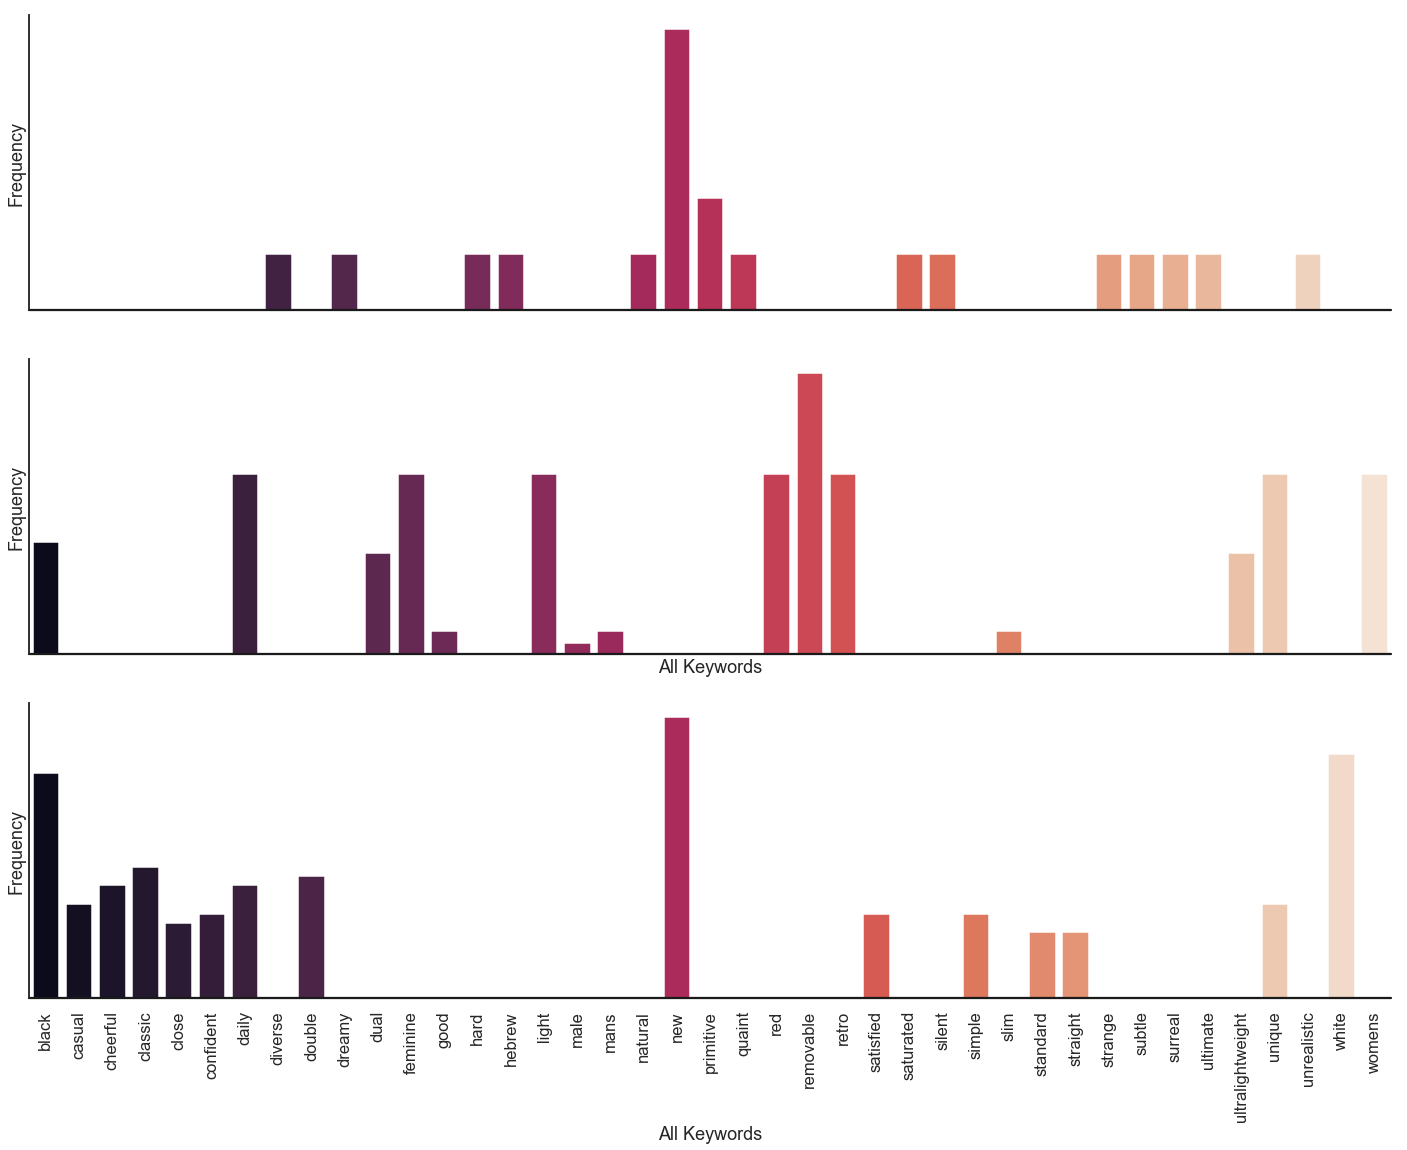

In [97]:
sns.set(style="white", context="talk");

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 15), sharex=True)

# Mutemuse
x = Key_total ["All Keywords"]
y1 = Key_total ["MM_FREQ"]
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_xlabel("")
ax1.set_ylabel("Frequency")


# MadGoat
y2 = Key_total["MG_FREQ"]
sns.barplot(x=x, y=y2, palette="rocket", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax1.set_xlabel("")
ax2.set_ylabel("Frequency")

# Avam
y3 = Key_total["AV_FREQ"]
sns.barplot(x=x, y=y3, palette="rocket", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Frequency")



# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
    # potential ytick values = 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
plt.tight_layout(h_pad=1)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

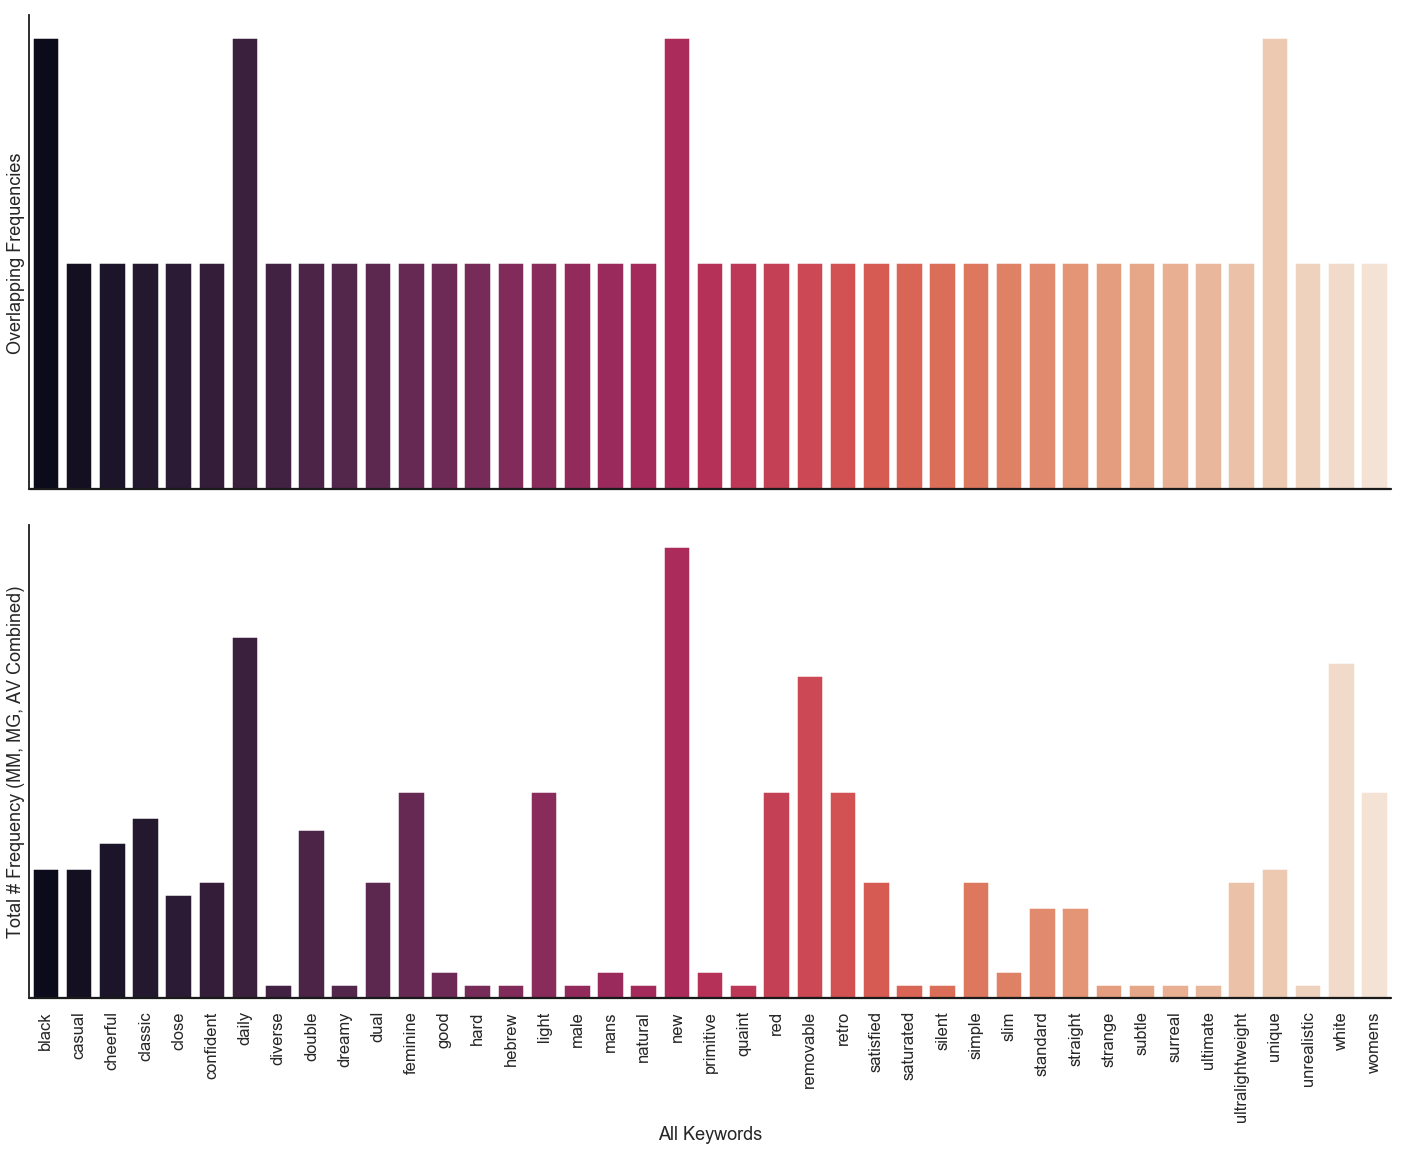

In [98]:
# Total

sns.set(style="white", context="talk");

# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15), sharex=True)

# Mutemuse
x = Key_total ["All Keywords"]
y1 = Key_total ["All Frequencies"]
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_xlabel("")
ax1.set_ylabel("Overlapping Frequencies")

# MadGoat
y2 = Key_total["TOTAL_FREQ"]
sns.barplot(x=x, y=y2, palette="rocket", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax1.set_xlabel("")
ax2.set_ylabel("Total # Frequency (MM, MG, AV Combined)")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=1)
#plt.yticks(yticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35])
plt.xticks(rotation=90)

## Conclusion
### Implication
What does it all mean? What did you find? What did you learn? 

### Limitation
Although part of my goal was to seek for uniformity present in South Korean leather bags, the result of this project could not provide an adequate answer. 

It needs a comparison

Due to limited time and skillset, I was unable to 

### Future Path

